In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
print('All library imported')

In [4]:
path = "permission_detection.csv"
for dirname, _, filenames in os.walk("permission_detection.csv"):
    for filename in filenames:
        path = (os.path.join(dirname, filename))
data = pd.read_csv(path)
columns = data.columns.tolist()
print(columns)
data.head()

['ACCESS_ALL_DOWNLOADS', 'ACCESS_CACHE_FILESYSTEM', 'ACCESS_CHECKIN_PROPERTIES', 'ACCESS_COARSE_LOCATION', 'ACCESS_COARSE_UPDATES', 'ACCESS_FINE_LOCATION', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_MOCK_LOCATION', 'ACCESS_MTK_MMHW', 'ACCESS_NETWORK_STATE', 'ACCESS_PROVIDER', 'ACCESS_SERVICE', 'ACCESS_SHARED_DATA', 'ACCESS_SUPERUSER', 'ACCESS_SURFACE_FLINGER', 'ACCESS_WIFI_STATE', 'activityCalled', 'ACTIVITY_RECOGNITION', 'ACCOUNT_MANAGER', 'ADD_VOICEMAIL', 'ANT', 'ANT_ADMIN', 'AUTHENTICATE_ACCOUNTS', 'AUTORUN_MANAGER_LICENSE_MANAGER', 'AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)', 'BATTERY_STATS', 'BILLING', 'BIND_ACCESSIBILITY_SERVICE', 'BIND_APPWIDGET', 'BIND_CARRIER_MESSAGING_SERVICE', 'BIND_DEVICE_ADMIN', 'BIND_DREAM_SERVICE', 'BIND_GET_INSTALL_REFERRER_SERVICE', 'BIND_INPUT_METHOD', 'BIND_NFC_SERVICE', 'BIND_NOTIFICATION_LISTENER_SERVICE', 'BIND_PRINT_SERVICE', 'BIND_REMOTEVIEWS', 'BIND_TEXT_SERVICE', 'BIND_TV_INPUT', 'BIND_VOICE_INTERACTION', 'BIND_VPN_SERVICE', 'BIND_WALLPAPER', '

ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
0                             0.0                   0.0              0.0   
1                             0.0                   0.0              0.0   
2                             0.0                   0.0              0.0   
3                             0.0                   0.0              0.0   
4                             0.0                   0.0              0.0   

   ACCESS_NETWORK_STATE  ...  \
0                   1.0  ...   
1                   1.0  ...   
2                   1.0  ...   
3                   0.0  ...   
4                   0.0  ...   

   Landroid/telephony/TelephonyManager;->getLine1Number  \
0                                                1.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Landroid/telephony/TelephonyManager;->getNetworkOperator  \
0                                                1.0          
1                                                0.0          
2                                                0.0          
3                                                1.0          
4                                                0.0          

   Landroid/telephony/TelephonyManager;->getNetworkOperatorName  \
0                                                1.0              
1                                                0.0              
2                                                0.0              
3                                                1.0              
4                                                0.0              

   Landroid/telephony/TelephonyManager;->getNetworkCountryIso  \
0                                                0.0            
1                                                1.0            
2                                                0.0            
3                                                1.0            
4                                                0.0            

   Landroid/telephony/TelephonyManager;->getSimOperator  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                1.0      
4                                                0.0      

   Landroid/telephony/TelephonyManager;->getSimOperatorName  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   Landroid/telephony/TelephonyManager;->getSimCountryIso  \
0                                                0.0        
1                                                

In [21]:
data = data.dropna()

In [22]:
lb = LabelEncoder()
data['Label'] = lb.fit_transform(data['Label'])
print(lb.classes_)
data.head()

['goodware' 'malware']


ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
0                             0.0                   0.0              0.0   
1                             0.0                   0.0              0.0   
2                             0.0                   0.0              0.0   
3                             0.0                   0.0              0.0   
4                             0.0                   0.0              0.0   

   ACCESS_NETWORK_STATE  ...  \
0                   1.0  ...   
1                   1.0  ...   
2                   1.0  ...   
3                   0.0  ...   
4                   0.0  ...   

   Landroid/telephony/TelephonyManager;->getLine1Number  \
0                                                1.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Landroid/telephony/TelephonyManager;->getNetworkOperator  \
0                                                1.0          
1                                                0.0          
2                                                0.0          
3                                                1.0          
4                                                0.0          

   Landroid/telephony/TelephonyManager;->getNetworkOperatorName  \
0                                                1.0              
1                                                0.0              
2                                                0.0              
3                                                1.0              
4                                                0.0              

   Landroid/telephony/TelephonyManager;->getNetworkCountryIso  \
0                                                0.0            
1                                                1.0            
2                                                0.0            
3                                                1.0            
4                                                0.0            

   Landroid/telephony/TelephonyManager;->getSimOperator  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                1.0      
4                                                0.0      

   Landroid/telephony/TelephonyManager;->getSimOperatorName  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   Landroid/telephony/TelephonyManager;->getSimCountryIso  \
0                                                0.0        
1                                                

In [23]:
data.describe()

ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
count           4464.000000              4464.000000   
mean               0.000896                 0.000896   
std                0.029924                 0.029924   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                0.000000                 0.000000   
max                1.000000                 1.000000   

       ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
count                4464.000000             4464.000000   
mean                    0.004928                0.083333   
std                     0.070037                0.276416   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     0.000000                0.000000   
75%                     0.000000                0.000000   
max                     1.000000                1.000000   

       ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
count            4464.000000           4464.000000   
mean                0.006944              0.087814   
std                 0.083053              0.283055   
min                 0.000000              0.000000   
25%                 0.000000              0.000000   
50%                 0.000000              0.000000   
75%                 0.000000              0.000000   
max                 1.000000              1.000000   

       ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
count                     4464.000000           4464.000000      4464.000000   
mean                         0.022849              0.023746         0.000224   
std                          0.149440              0.152272         0.014967   
min                          0.000000              0.000000         0.000000   
25%                          0.000000              0.000000         0.000000   
50%                          0.000000              0.000000         0.000000   
75%                          0.000000              0.000000         0.000000   
max                          1.000000              1.000000         1.000000   

       ACCESS_NETWORK_STATE  ...  \
count           4464.000000  ...   
mean               0.596326  ...   
std                0.490689  ...   
min                0.000000  ...   
25%                0.000000  ...   
50%                1.000000  ...   
75%                1.000000  ...   
max                1.000000  ...   

       Landroid/telephony/TelephonyManager;->getLine1Number  \
count                                        4464.000000      
mean                                            0.173163      
std                                             0.378431      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             0.000000      
max                                             1.000000      

       Landroid/telephony/TelephonyManager;->getNetworkOperator  \
count                                        4464.000000          
mean                                            0.245520          
std                                             0.430443          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                             1.000000          

       Landroid/telephony/TelephonyManager;->getNetworkOperatorName  \
count                                        4464.000000              
mean                                            0.215950              
std                                        

In [24]:
data["Label"].value_counts()

Label
1    3565
0     899
Name: count, dtype: int64

In [25]:
fig, axes = plt.subplots(41, 6, figsize = (150, 150))
axes = axes.ravel()
for col, ax in zip(columns, axes):
    plot = sns.histplot(data[col], kde = True, stat='density', ax = ax)
    plot.set_xlabel(col, fontsize = 35)
    plot.set_ylabel('density', fontsize = 35)
plt.show()

In [26]:
y = data['Label']
X = data.drop(['Label'], axis = 1)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_smote.shape)
ones = 0
zeros = 0
for i in y_smote:
    if i == 1:
        ones+=1
    else:
        zeros += 1
print(ones, zeros)

Original dataset shape (4464,)
Resample dataset shape (7130,)
3565 3565


Support vector
99.15848527349227


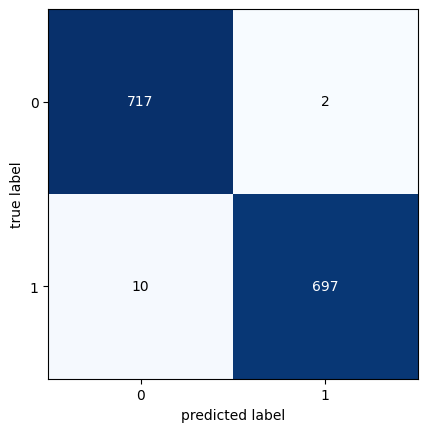



Logistic regression
99.15848527349227


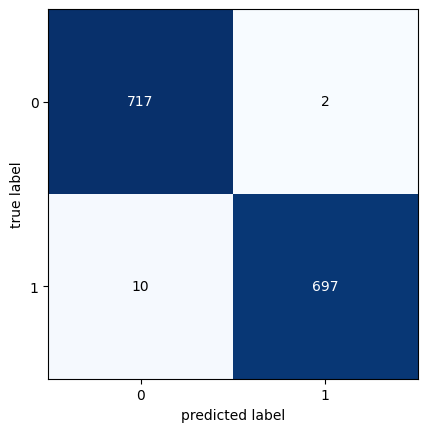



Random Forest
99.4389901823282


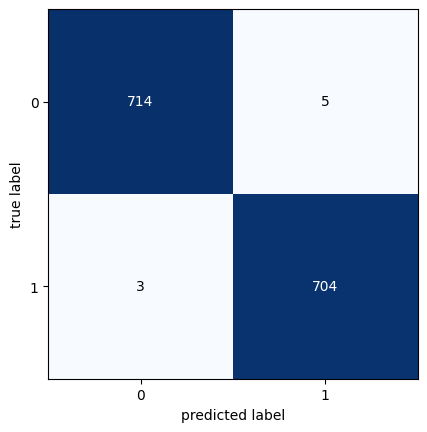



Adaboost
98.24684431977559


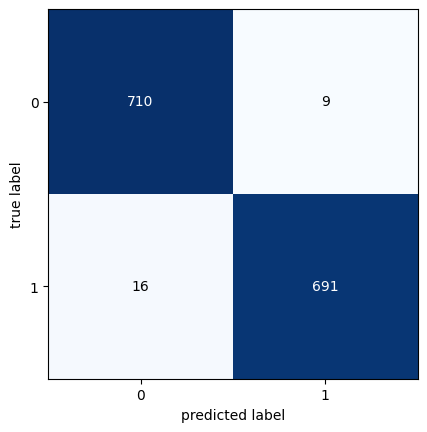



1D CNN
Epoch 1/3
143/143 [==============================] - 13s 72ms/step - loss: 0.3353 - accuracy: 0.9349 - val_loss: 0.1215 - val_accuracy: 0.9763
Epoch 2/3
143/143 [==============================] - 2s 12ms/step - loss: 0.0874 - accuracy: 0.9787 - val_loss: 0.0679 - val_accuracy: 0.9781
Epoch 3/3
45/45 [==============================] - 0s 4ms/step
98.17671809256662


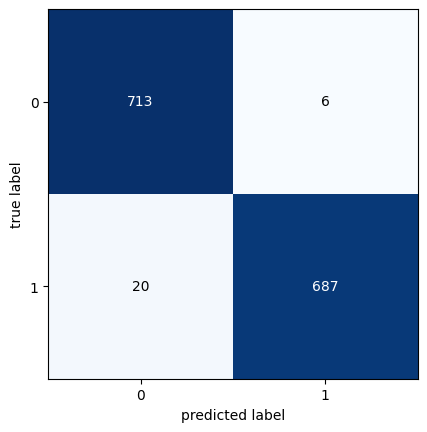

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.02, random_state=0)

# List of models
models = [
    [SVC(), "Support vector"],
    [LogisticRegression(), "Logistic regression"],
    [RandomForestClassifier(n_estimators=10), "Random Forest"],
    [AdaBoostClassifier(n_estimators=25), "Adaboost"],
    
    # Adding a simple 1D CNN
    [Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(1, activation='sigmoid')  
    ]), "1D CNN"]
]

model_acc = []

for i in models:
    name = i[1]
    model = i[0]
    print(name)

    if isinstance(model, Sequential):  
        X_train_cnn = np.expand_dims(X_train, axis=-1)
        X_test_cnn = np.expand_dims(X_test, axis=-1)
        
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_cnn, y_train, epochs=3, batch_size=32, validation_split=0.2)
    else:
        model.fit(X_train, y_train)

    if isinstance(model, Sequential):
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    print(acc)
    
    cnf = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cnf)
    model_acc.append([name, acc])
    plt.show()
    print("\n")

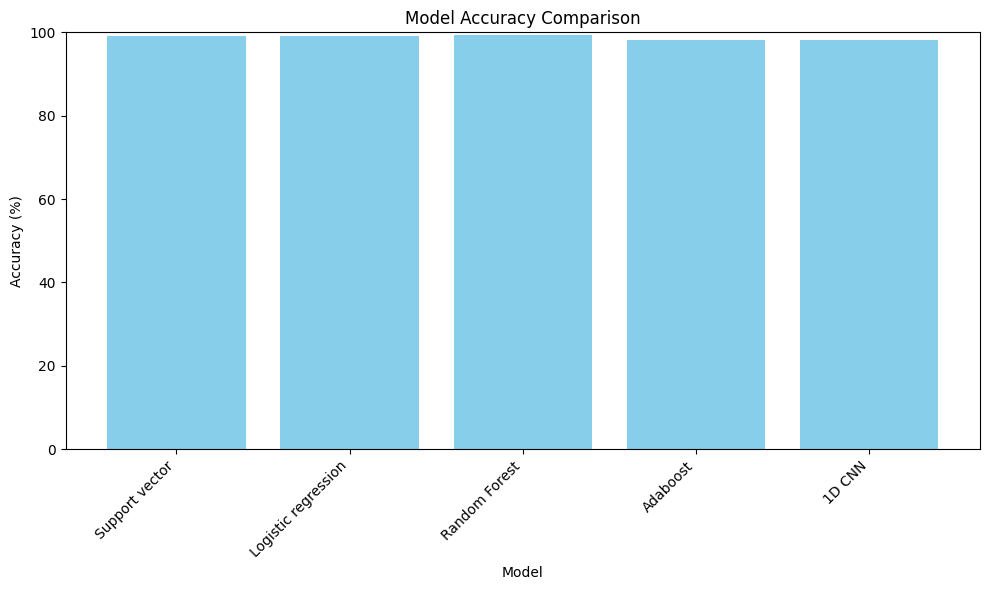

In [34]:


model_names = [item[0] for item in model_acc]
accuracies = [item[1] for item in model_acc]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

# Show the bar chart
plt.show()
